# Electric Machinery Fundamentals 5th edition
## Chapter 3

## Animation: Three-phase fluxes 

(based on [Example 3-1](Ch3-Example_3-01.ipynb))

**Calculate the net magetic field produced by a three-phase stator (adapted for 50Hz).**

Import the PyLab namespace (provides set of useful commands and constants like $\pi$):

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set up the basic conditions:

In [2]:
bmax = 1           # Normalize bmax to 1
freq = 50          # [Hz]
w = 2*pi*freq      # [rad/s] angluar velocity

First, generate the three component magnetic fields

In [3]:
t = linspace(0, 1./50, 100)   # 100 values for one period
wt = w*t   # we are going to use this quite often

# amplitudes (changed them to see effect of unsymmetry):
B_amp = [[1.0], [1.0], [1.0]]
# time variants
B_time = array([sin(wt),
                sin(wt-2*pi/3),
                sin(wt+2*pi/3)])
# vectorial shifts
B_shift = [[cos(0) + 1j*sin(0)],
           [cos(2*pi/3) + 1j*sin(2*pi/3)], 
           [cos(-2*pi/3) + 1j*sin(-2*pi/3)]]
# all combined
B_ph = B_amp * B_time
B = B_ph * B_shift

Calculate total flux vector `Btot`:

In [4]:
Btot = B[0] + B[1] + B[2]

Calculate a circle representing the expected maximum value of `Btot`:

In [5]:
circle = 1.5 * (cos(wt) + 1j*sin(wt))

**Generating  the animation:**

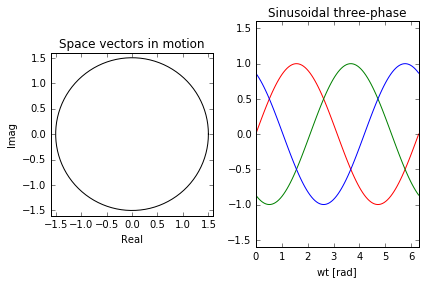

In [6]:
# First set up the figure, the axis, and the plot element we want to animate
from matplotlib import animation
fig = figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title('Space vectors in motion')
ax1.set_xlabel('Real')
ax1.set_ylabel('Imag')
ax1.set_xlim(-1.6, 1.6)
ax1.set_ylim(-1.6, 1.6)
ax1.set_aspect('equal')
ax2.set_title('Sinusoidal three-phase')
ax2.set_xlabel('wt [rad]')
ax2.set_xlim(0, 2*pi)
ax2.set_ylim(-1.6, 1.6)
# set up the different line colours
la, lb, lc, ltot, circ = ax1.plot([], [], 'red', 
                            [], [], 'green', 
                            [], [], 'blue', 
                            [], [], 'magenta', 
                            [], [], 'magenta', 
                            lw=2)

# set up the moving dots
da, db, dc = ax2.plot([], [], 'ro',   
                      [], [], 'go',
                      [], [], 'bo', 
                      lw=2)

tight_layout()  # sometimes useful when sub-plots get a bit crowded

# initialization function: plot the background of each frame
def init():
    ax1.plot(real(circle), imag(circle), 'black');
    ax2.plot(wt, B_ph[0,], 'red',
             wt, B_ph[1,], 'green',
             wt, B_ph[2,], 'blue',
             lw=1);
    return

# animation function.  This is called sequentially
def animate(i):
    re = [asscalar(real(B[0,i])), asscalar(real(B[1,i])), asscalar(real(B[2,i]))]
    im = [asscalar(imag(B[0,i])), asscalar(imag(B[1,i])), asscalar(imag(B[2,i]))]
    la.set_data([0, re[0]], [0, im[0]])
    lb.set_data([re[0], re[0]+re[1]], [im[0], im[0]+im[1]])
    lc.set_data([re[0]+re[1], re[0]+re[1]+re[2]], [im[0]+im[1], im[0]+im[1]+im[2]])
    ltot.set_data([0, real(Btot[i])], [0, imag(Btot[i])])
    circ.set_data(real(Btot[:i]),imag(Btot[:i]))
    da.set_data(wt[i], B_ph[0,i])
    db.set_data(wt[i], B_ph[1,i])
    dc.set_data(wt[i], B_ph[2,i])
    return la, lb, lc, ltot, da, db, dc
    
# call the animator:  
anim = animation.FuncAnimation(fig, animate, init_func=init, interval=50)   

If run "normally" (and not in "inline" mode like we are doing here) the command above would have opened a window with the animation running.
On the server we can only run "inline" mode but there is a solution to simply generate the animation as a video and embed it right here:

In [7]:
from IPython.display import HTML
HTML(anim.to_html5_video())